In [1]:
from collections import defaultdict

from matplotlib import pyplot as plt
%matplotlib inline

import os
import sys

module_path = os.path.abspath('..')
if module_path not in sys.path:
    sys.path.append(module_path)
from music_transcription.pitch_detection.read_data import _read_onset_times_pitches
from music_transcription.read_data import get_wav_and_truth_files

In [5]:
def count_pitches(active_datasets, min_pitch=40, max_pitch=88):
    wav_file_paths, truth_dataset_format_tuples = get_wav_and_truth_files(active_datasets)
    pitches = defaultdict(int)
    for path_to_xml, dataset, truth_format in truth_dataset_format_tuples:
        if truth_format != 'xml':
            raise ValueError('Unsupported format {}'.format(truth_format))
        _, pitches_grouped = _read_onset_times_pitches(path_to_xml, 40, 88, dataset, 0.05)
        if pitches_grouped is not None:
            for pitch_group in pitches_grouped:
                for pitch in pitch_group:
                    pitches[pitch] += 1

    for pitch in range(min_pitch, max_pitch + 1):
        if pitch not in pitches:
            pitches[pitch] = 0
                    
    return pitches


def print_pitches(pitches):
    print('PITCHES')
    print('min pitch = {}'.format(min(pitches.keys())))
    print('max pitch = {}'.format(max(pitches.keys())))
    print('nr of pitches = {}'.format(sum(pitches.values())))
    for pitch, count in sorted(pitches.items()):
        print('{}: {}'.format(pitch, count))

In [6]:
print_pitches(pitches)

PITCHES
min pitch = 40
max pitch = 88
nr of pitches = 7313
40: 64
41: 28
42: 20
43: 85
44: 45
45: 232
46: 69
47: 174
48: 389
49: 157
50: 349
51: 109
52: 404
53: 188
54: 331
55: 339
56: 263
57: 372
58: 140
59: 450
60: 251
61: 363
62: 359
63: 104
64: 373
65: 120
66: 141
67: 210
68: 66
69: 249
70: 56
71: 65
72: 71
73: 45
74: 79
75: 21
76: 21
77: 66
78: 79
79: 67
80: 43
81: 43
82: 43
83: 49
84: 26
85: 23
86: 23
87: 23
88: 26


C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:133: UserWarning: Skipping AR_Lick11_FN.wav, no truth found.
  warn('Skipping ' + wav_file + ', no truth found.')
C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:133: UserWarning: Skipping AR_Lick11_KN.wav, no truth found.
  warn('Skipping ' + wav_file + ', no truth found.')
C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:133: UserWarning: Skipping AR_Lick11_MN.wav, no truth found.
  warn('Skipping ' + wav_file + ', no truth found.')
C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:135: UserWarning: Skipping ..\data\IDMT-SMT-GUITAR_V2\dataset2\audio\desktop.ini, not a .wav file.
  warn('Skipping ' + path_to_wav + ', not a .wav file.')
C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:133: UserWarning: Skipping FS_Lick11_FN.wav, no truth found.
  warn('Skipping ' + wav_file + ', no truth found.')
C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:133: UserWarning: Skipping F

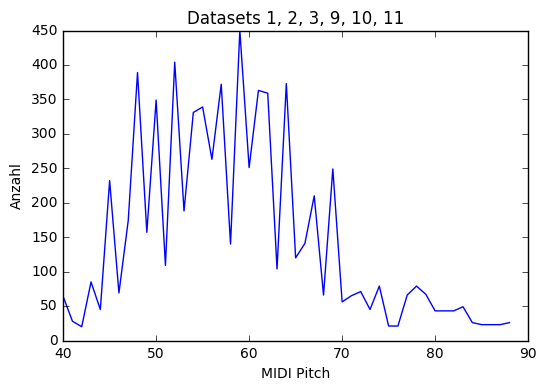

In [9]:
pitches = count_pitches({1, 2, 3, 9, 10, 11})
_ = plt.plot([int(k) for k in pitches.keys()], [int(v) for v in pitches.values()])
_ = plt.title('Datasets 1, 2, 3, 9, 10, 11')
_ = plt.xlabel('MIDI Pitch')
_ = plt.ylabel('Anzahl')

C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:133: UserWarning: Skipping AR_Lick11_FN.wav, no truth found.
  warn('Skipping ' + wav_file + ', no truth found.')
C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:133: UserWarning: Skipping AR_Lick11_KN.wav, no truth found.
  warn('Skipping ' + wav_file + ', no truth found.')
C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:133: UserWarning: Skipping AR_Lick11_MN.wav, no truth found.
  warn('Skipping ' + wav_file + ', no truth found.')
C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:135: UserWarning: Skipping ..\data\IDMT-SMT-GUITAR_V2\dataset2\audio\desktop.ini, not a .wav file.
  warn('Skipping ' + path_to_wav + ', not a .wav file.')
C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:133: UserWarning: Skipping FS_Lick11_FN.wav, no truth found.
  warn('Skipping ' + wav_file + ', no truth found.')
C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:133: UserWarning: Skipping F

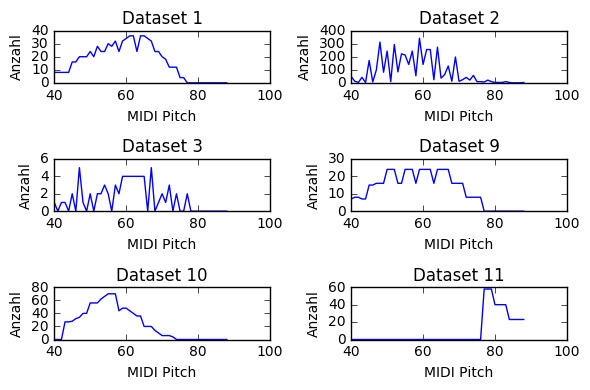

In [20]:
f, axarr = plt.subplots(3, 2)
datasets = [1, 2, 3, 9, 10, 11]
ds_index = 0
for i in range(axarr.shape[0]):
    for j in range(axarr.shape[1]):
        ds = datasets[ds_index]
        pitches = count_pitches({ds})
        _ = axarr[i, j].plot([int(k) for k in pitches.keys()], [int(v) for v in pitches.values()])
        _ = axarr[i, j].set_title('Dataset {}'.format(ds))
        _ = axarr[i, j].set_xlabel('MIDI Pitch')
        _ = axarr[i, j].set_ylabel('Anzahl')
        _ = axarr[i, j].locator_params(nbins=4)
        ds_index += 1
f.tight_layout()